In [2]:
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import Adam
from keras.layers import BatchNormalization
import matplotlib.pyplot as plt
import numpy as np

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
x_test.shape

(10000, 28, 28)

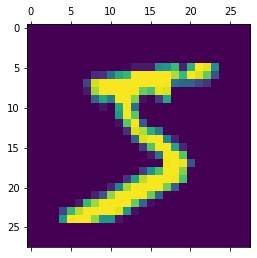

In [6]:
plt.matshow(x_train[0])

In [7]:
trainX = x_train.reshape((x_train.shape[0], 28, 28, 1))
testX = x_test.reshape((x_test.shape[0], 28, 28, 1))

trainY = to_categorical(y_train)
testY = to_categorical(y_test)

In [10]:
train_norm = trainX.astype('float32')
test_norm = testX.astype('float32')


train_norm = train_norm / 255.0
test_norm = test_norm / 255.0

In [13]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dense(10, activation='softmax'))
# compiling our model
opt = Adam(lr=0.01)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

		

In [14]:
model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY), verbose=0)

In [18]:
print(model.evaluate(trainX, trainY))

1875/1875 [==============================] - 13s 7ms/step - loss: 0.0074 - accuracy: 0.9976
[0.007430372294038534, 0.9975666403770447]
